In [10]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold

# Set the seed value for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [3]:
# Using adult data
# Some preprocessing steps
features_df = pd.read_csv('data/adult_data_features.csv')

# Replacing "?" with np.NaN
features_df = features_df.replace("?", np.NaN)

# Dropping all rows with one or more null attributes
features_df = features_df.dropna()

# Dropping 'education' column since 'education-num' is the same column in numerical format
# Dropping 'fnlgwt' since don't know what it means
# features_df[['education', 'education-num']]
features_df = features_df.drop(['education', 'fnlwgt'], axis=1)

# Converting all categorical variables using one hot encoding
features_df = pd.get_dummies(features_df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex'], dtype='int')

# Changing dtype to float
features_df = features_df.astype('float')

display(features_df)

# Get corresponding labels
labels = pd.read_csv('data/adult_data_targets.csv')
labels = labels.loc[features_df.index, :]

# Sanitizing the labels by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
labels.replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

# Change the labels to 0 and 1
labels = labels.map(lambda x : 1 if x == ">50K" else 0)

labels.value_counts()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
0,39.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,53.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48837,39.0,13.0,0.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48839,38.0,13.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48840,44.0,13.0,5455.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


income
0         34014
1         11208
Name: count, dtype: int64

In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value)

# Standardize the data for all features except the categorical variables
scaler = StandardScaler()
X_train.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_train.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
X_test.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.transform(X_test.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [97]:
X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
8624,-0.495612,1.128527,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28487,0.486803,0.737073,-0.144863,-0.21704,2.089355,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
33913,0.486803,-1.220199,-0.144863,-0.21704,0.754713,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14435,0.033381,-0.437290,-0.144863,-0.21704,2.423016,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41844,0.940226,-0.437290,-0.144863,-0.21704,-0.246268,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,-0.949035,-0.045836,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48312,-1.100176,1.128527,-0.144863,-0.21704,0.754713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41204,-0.571183,-0.045836,-0.144863,-0.21704,-0.079438,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
935,-0.117760,-0.437290,-0.144863,-0.21704,4.842054,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
y_train

,income
8624,0
28487,0
33913,0
14435,0
41844,0
...,...
12203,0
48312,0
41204,0
935,1


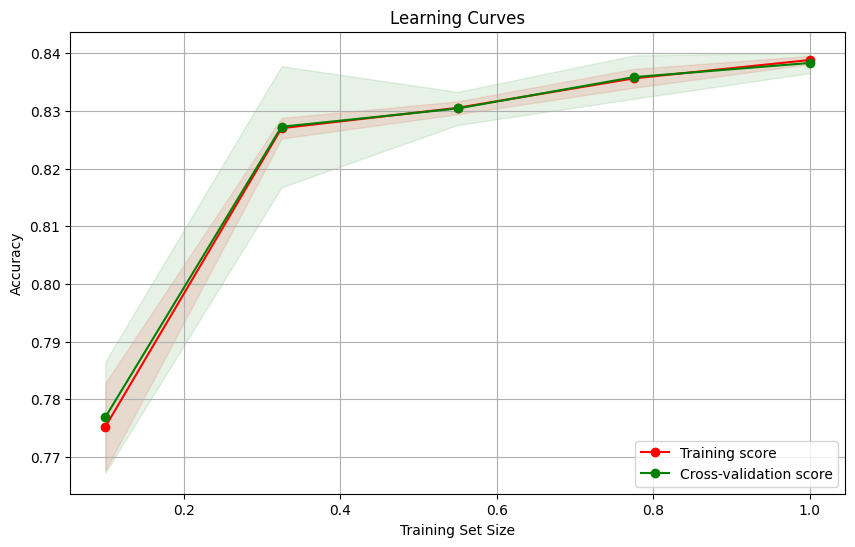

In [106]:
def create_model(seed=None):
    model = keras.models.Sequential([
        # keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

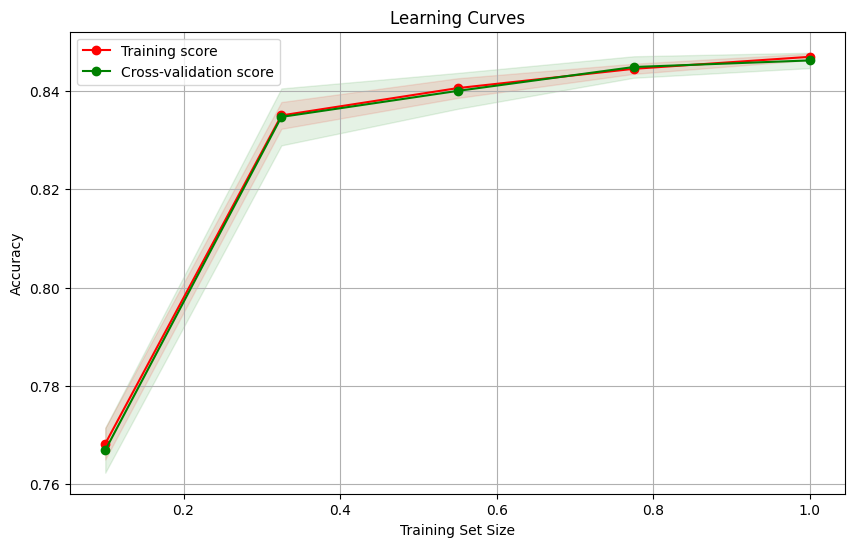

In [105]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

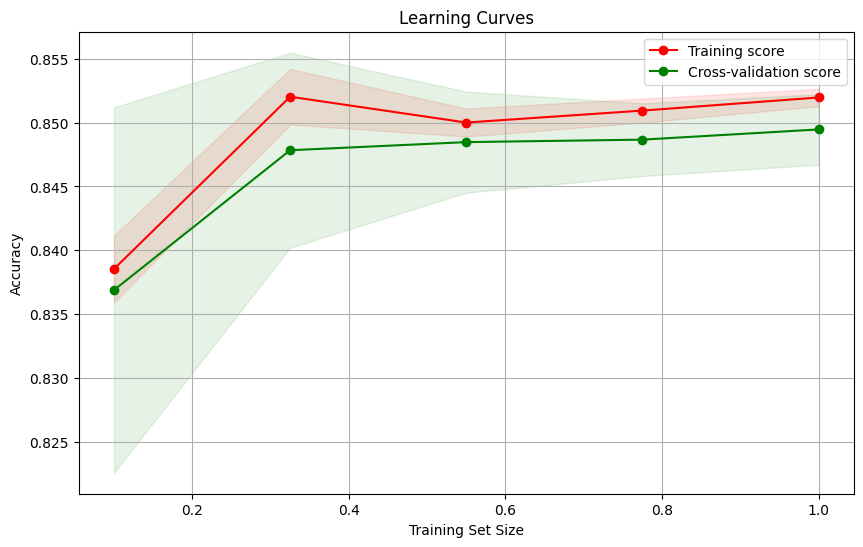

In [108]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

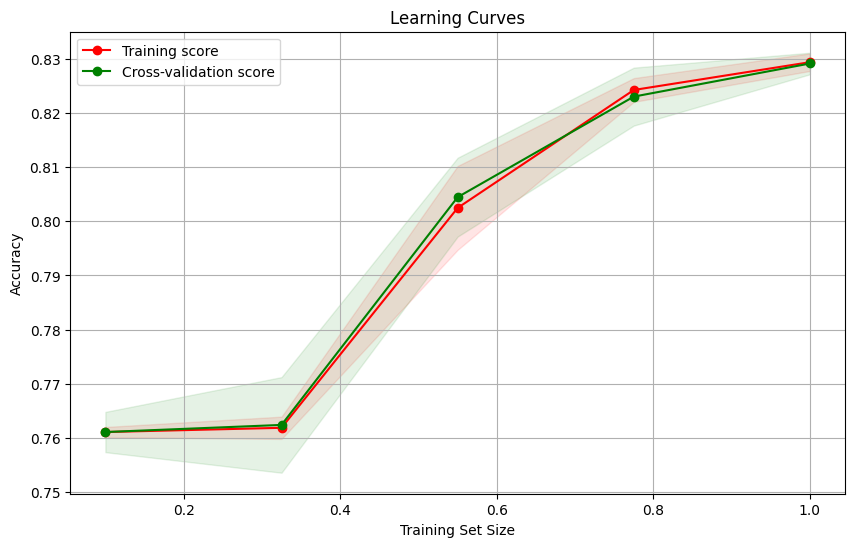

In [109]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

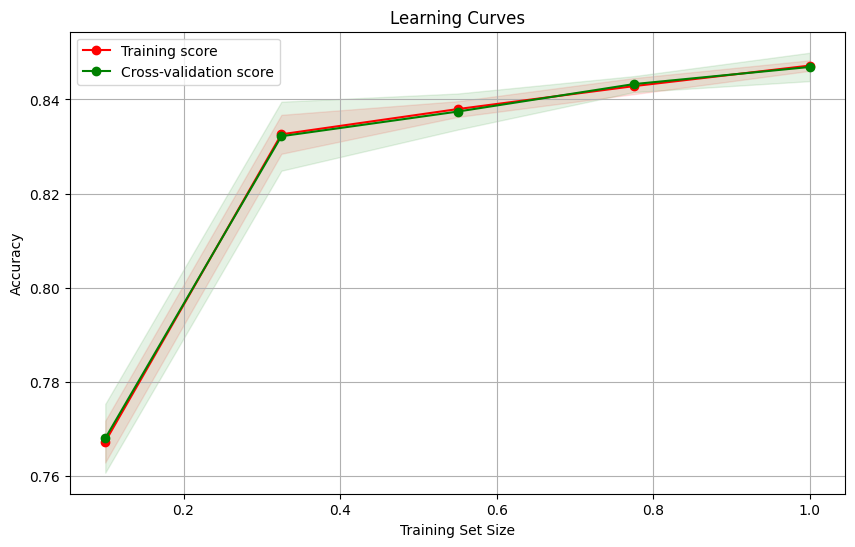

In [110]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

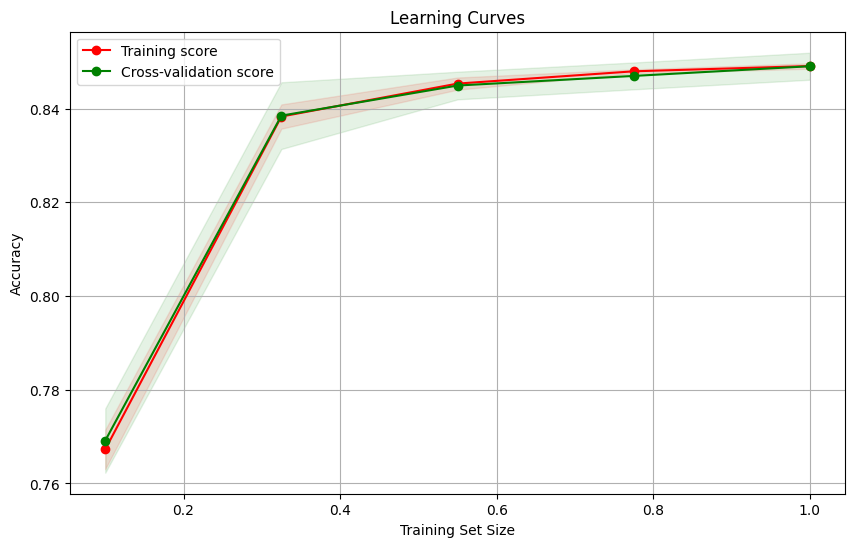

In [114]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

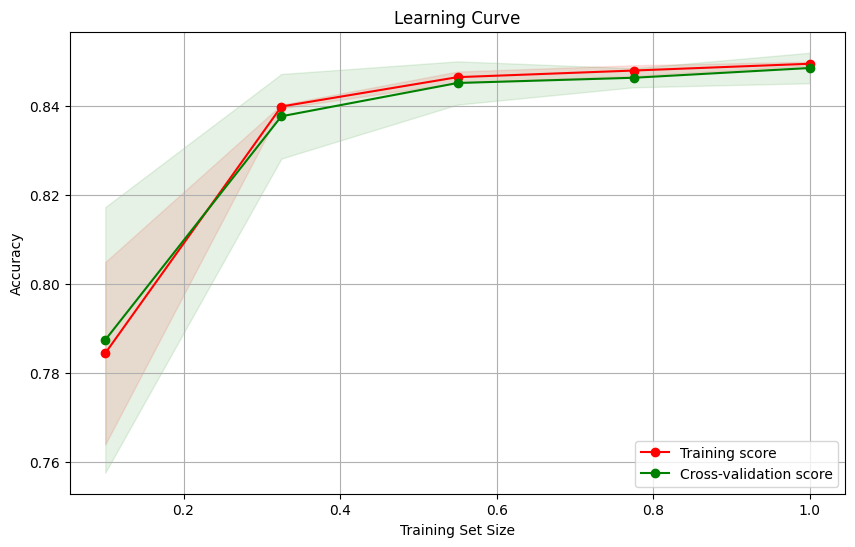

In [113]:
def create_model(seed=None):
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=128, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

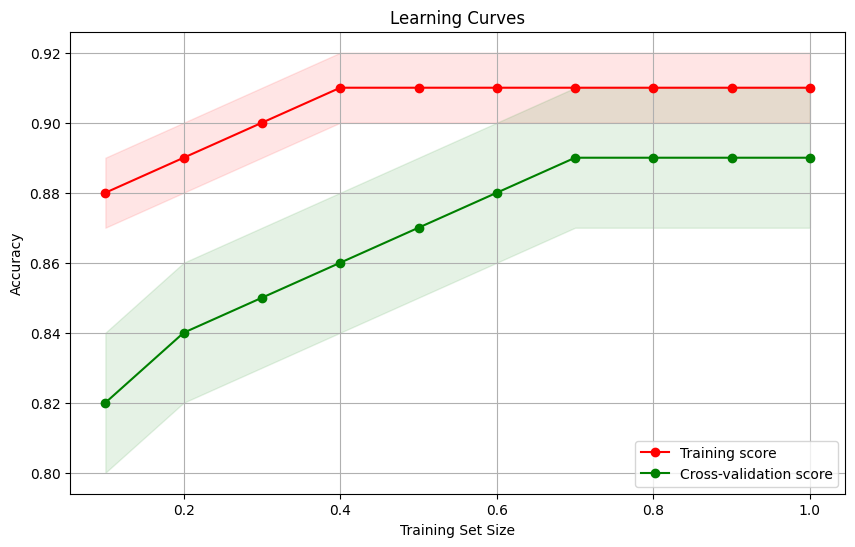

In [104]:

# Hypothetical training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Hypothetical scores
train_mean_scores = [0.88, 0.89, 0.90, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91]
val_mean_scores = [0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.89, 0.89, 0.89]
train_std_scores = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
val_std_scores = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [93]:

# Define the subset sizes as a percentage of the total training set
train_sizes = np.linspace(0.1, 1.0, 5)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_scores = []
val_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
    y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
    
    model = create_model()
    
    history = model.fit(X_train_fold, y_train_fold, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(X_val_fold, y_val_fold), 
                        verbose=0)
    
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

print(f'Training Accuracy: {np.mean(train_scores):.3f} ± {np.std(train_scores):.3f}')
print(f'Validation Accuracy: {np.mean(val_scores):.3f} ± {np.std(val_scores):.3f}')

Training Accuracy: 0.841 ± 0.001
Validation Accuracy: 0.841 ± 0.002


In [82]:
def create_model():
    model = keras.models.Sequential([
        # keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    return model

# Define the subset sizes as a percentage of the total training set
train_sizes = np.linspace(0.1, 1.0, 1)

train_scores = []
val_scores = []

for size in train_sizes:
    if size != 1.0:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=seed_value, stratify=y_train)
    else:
        X_train_subset = X_train
        y_train_subset = y_train
    
    model = create_model()
    
    # history = model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=128, verbose=0)
    history = model.fit(X_train_subset, y_train_subset, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=0)
    
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

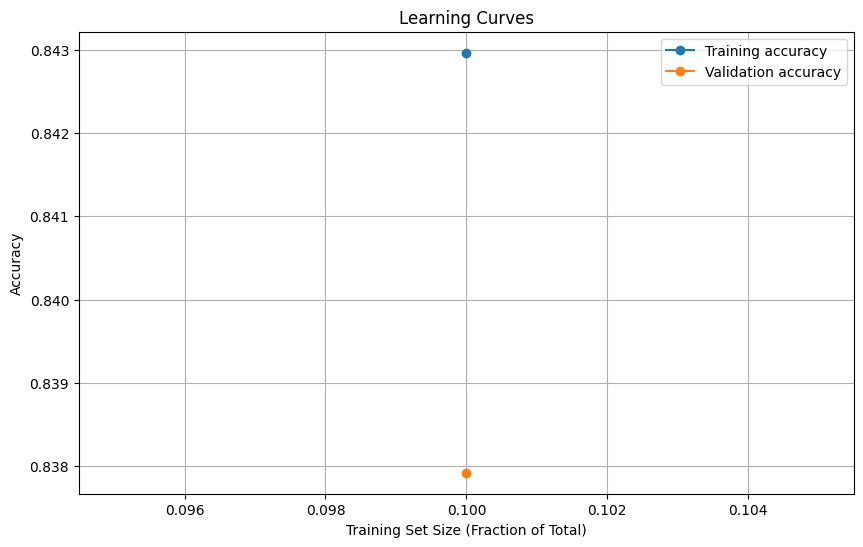

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training accuracy')
plt.plot(train_sizes, val_scores, 'o-', label='Validation accuracy')
plt.title('Learning Curves')
plt.xlabel('Training Set Size (Fraction of Total)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [116]:
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(2, activation='softmax')
])




In [117]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7078 - loss: 0.5791 - val_accuracy: 0.7497 - val_loss: 0.5287
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7557 - loss: 0.5151 - val_accuracy: 0.7539 - val_loss: 0.4939
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7595 - loss: 0.4803 - val_accuracy: 0.7658 - val_loss: 0.4559
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7729 - loss: 0.4435 - val_accuracy: 0.8015 - val_loss: 0.4216
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.4120 - val_accuracy: 0.8191 - val_loss: 0.3971
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8236 - loss: 0.3904 - val_accuracy: 0.8187 - val_loss: 0.3817
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.3770 - val_accuracy: 0.8214 - val_loss: 0.3722
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8293 - loss: 0.3688 - val_accuracy: 0.

In [37]:
model.evaluate(X_test, y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8499 - loss: 0.3250


[0.3221777677536011, 0.8497512340545654]

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

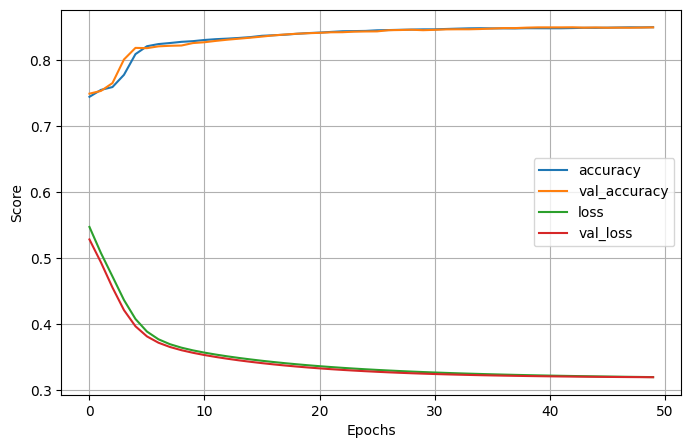

In [120]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot(figsize=(8,5))
# pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8,5))
plt.grid(True)
# plt.gca().set_ylim(0,1)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [121]:
# Calculate f1 score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


In [122]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.852
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6745
           1       0.74      0.63      0.69      2300

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045

Confusion Matrix:
[[6245  500]
 [ 840 1460]]


Dataset 2

In [2]:
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels = pd.read_csv('data/breast_cancer_data_targets.csv')

labels = labels.map(lambda x : 0 if x == 'B' else 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value)

labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

In [3]:
features_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


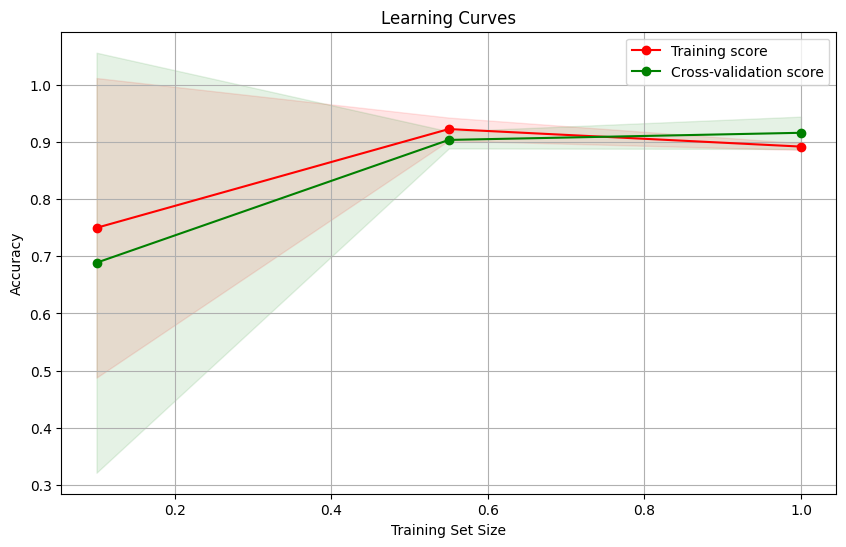

In [19]:
def create_model(seed=None):
    model = keras.models.Sequential([
        # keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


# Define different training sizes
train_sizes = np.linspace(0.1, 1.0, 3)

kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)

train_mean_scores = []
val_mean_scores = []
train_std_scores = []
val_std_scores = []

for train_size in train_sizes:
    train_scores = []
    val_scores = []

    # Select a subset of the training data
    subset_size = int(X_train.shape[0] * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    for train_index, val_index in kf.split(X_subset):
        X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        y_train_fold, y_val_fold = y_train.iloc[train_index, :], y_train.iloc[val_index, :]
        
        model = create_model(seed=seed_value)
        
        history = model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=8, validation_data=(X_val_fold, y_val_fold), verbose=0)
        
        train_scores.append(history.history['accuracy'][-1])
        val_scores.append(history.history['val_accuracy'][-1])

    train_mean_scores.append(np.mean(train_scores))
    train_std_scores.append(np.std(train_scores))
    val_mean_scores.append(np.mean(val_scores))
    val_std_scores.append(np.std(val_scores))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean_scores, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, 
                 np.array(train_mean_scores) - np.array(train_std_scores), 
                 np.array(train_mean_scores) + np.array(train_std_scores), 
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                 np.array(val_mean_scores) - np.array(val_std_scores), 
                 np.array(val_mean_scores) + np.array(val_std_scores), 
                 alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [21]:
# Calculate f1 score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test accuracy: 0.956
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[69  2]
 [ 3 40]]


In [125]:
X_test

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796
